Please fill in your name and that of your teammate.

You: Bhargav Solanki

Teammate: Carmen Sangro Prieto

# Introduction

Finally :) Welcome to the thirteenth, and last, lab. Over the past few weeks you have been exposed to the current state of the art, its complexity, and limitations. There are literally tens of thousands of very smart people working to push those limitations farther; only 1%-5% of those are currently working on Black Box Optimization, Neuroevolution and similar topics, but more research is being steered in this direction over the years (search for example for Deepmind's "Population Based Training").

Whether these methods will become the new trend, or will be left in the dust by a new superior approach, the future is in your hands now. The objective of this lab is to expose you to plausible, promising alternatives to today's trend: remember that Occam's Razor favors simplicity and elegance over complex frameworks. Enjoy!

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 12 points (out of 18 available) to pass** (66%).

# 1. Fundamentals

#### 1.1 **[1pt]** Why are multimodal problems hard?

They can easily fall in the trap of local optimas. And there can several of those. hence they are hard.

#### 1.2 **[2pt]** Define the following: (i) multi-agent algorithm, (ii) black-box optimization, (iii) evolutionary algorithm.

(i) A **multi-agent algorithm** consists of multiple decision-making agents which interact in a shared environment to achieve common or conflicting goals. 

(ii) **Black box optimization (BBO)** consists in the design and analysis of algorithms for problems where the structure of the problem (i.e. the objective function and/or the constraints) is unknown, unexploitable, or non-existent. They optimize a parameter set only based on a score, making them directly applicable to Reinforcement Learning problems.

(iii) An **evolutionary algorithm (EA)** is an algorithm that uses mechanisms inspired by nature and solves problems through processes that emulate the behaviors of living organisms. They are inspired in Darwin's natural evolution theory. There are three main concepts regarding EA's: a parametrization is called an **individual**, a set is a **population** and the score function is called **fitness**.

#### 1.3 **[2pt]** Describe in which way the following algorithms differ from an implementation perspective: (i) Genetic Algorithms, (ii) Evolution Strategies, (iii) Genetic Programming.

The three algorithms differ mainly in the representation of genes (regarding individuals) and the preference of operators.

(i) **Genetic Algorithms**: they operate mostly on bit strings, and are best suited for discrete optimization.

(ii) **Evolution Strategies**: they operate on real vectors and are best suited for continuous optimization.

(iii) **Genetic Programming**: it's a technique of evolving programs, that operate on computational trees (that are potentially Turing-complete): each node contains an operand that is applied to the following nodes (the "children").

#### 1.4 **[1pt]** What is the difference between a $(1+1)$ and a $(2,2)$ population model?

In a (1 +1) model, one parent and one child are maintained, and the model chooses between them the most suited one. On the contrary, in a (2,2) model, two individuals chosen as parents are replaced by other two individuals, considered children/offspring.

#### 1.5 **[1pt]** Define Neuroevolution.

Neuroevolution is a form of artificial intelligence (AI) that uses evolutionary algorithms to generate artificial neural networks (ANN), parameters, topology and rules, taking as inspiration the evolution of biological nervous systems in nature. Compared to other NN learning methods, neuroevolution is highly general; it allows learning without explicit targets, with only sparse feedback, and with arbitrary neural models and network structures. 

# 2. Evolution Strategies

#### 2.1 **[3pt]** Write a Step Size Adaptive $(1+1)$ Evolution Strategy algorithm in Python as a script (no classes). Run it on the Sphere Minimization problem and plot the *sigma* and *best fitness* on a logarithmic scale (single graph).

- For the learning rate / step size use the formula $c=1+\frac{1}{d}$ with $d$ number of problem parameters (dimensions).
- You can test it on the Sphere Minimization problem: `lambda x: np.linalg.norm(x)**2` (does it matter if you keep or remove the "square"? Why?).
- Think before you begin implementing: do you need to minimize or maximize this fitness?
- The plot is there to help you debug it.

[ 1.60449539  1.28081623 -0.64191475]


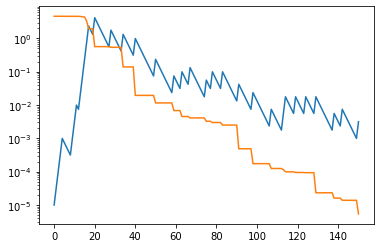

In [1]:
# FIRST IMPLEMENTATION: script
import numpy as np
import gym
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fitness = lambda t: np.linalg.norm(t)**2
ndims = 3
sigma = 1e-5
x = np.random.randn(ndims)
#x = [ 0.59139189 -1.31942769 -0.19959163]
sphere = lambda t: np.linalg.norm(t)**2
print(x)

trg_fit = 1e-5 # stopping criterion
lrate = 1 + 1 / ndims

fit_x = sphere(x)

sigmas = [sigma]
fits = [fit_x]
count = 100
while fit_x > trg_fit:
    # create new individual
    y = [np.random.normal(temp, sigma) for temp in x]
    fit_y = fitness(y)
    # compare fitness
    if fit_y <= fit_x:
        x = y
        fit_x = fit_y
        sigma = sigma * pow(lrate,4)
    else:
        sigma = sigma/lrate
    sigmas.append(sigma)
    fits.append(fit_x)
    count -=1

ax = sns.lineplot(x=range(len(sigmas)), y=sigmas)
sns.lineplot(x=range(len(fits)), y=fits)
ax.set_yscale('log')

#### 2.2 **[3pt]** Refactor your ES implementation into a Python Class.

- This will make it easier to include it later in your Neuroevolution framework.
- Copy your (working) script implementation, then create a Python `class` out of it, splitting the code into methods and adding a ton of `self.`s.
- Careful: I know it sounds obvious, but you should double- and triple-check all the `self`s. Also restart the kernel and comment out all testing, so that you make absolutely sure your code is not capturing global variable definitions through closures.
- I implemented the following methods: `__init__()`, `step()`, `run()` and `plot()`. The last for convenience: save the `sigma` and `best_fit` in class variables and then call `plot()` to generate the plots you prepared for the previous question.

......................................................................................................................................

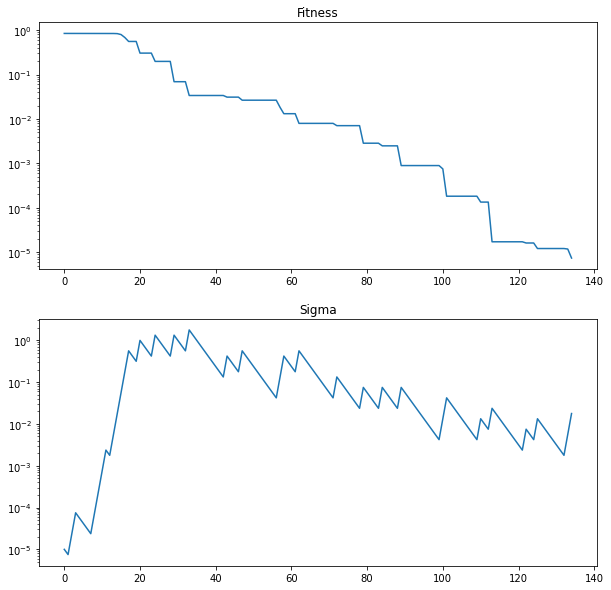

In [2]:
# SECOND IMPLEMENTATION: class

class ES11:
    def __init__(self, ndims, sigma, fitness, lrate=None):
        self.ndims = ndims
        self.sigma = sigma
        self.fitness = fitness
        self.x = np.random.randn(ndims)
        if lrate is None:
            self.lrate = 1 + 1 / ndims
        else:
            self.lrate = lrate
        self.fit_x = fitness(self.x)
        self.sigmas = [self.sigma]
        self.fits = [self.fit_x]

    def step(self):
        print('.', end='', flush=True)
        # create new individual
        y = [np.random.normal(temp, self.sigma) for temp in self.x]
        fit_y = self.fitness(y)
        # compare fitness
        if fit_y <= self.fit_x:
            self.x = y
            self.fit_x = fit_y
            self.sigma = self.sigma * pow(self.lrate,4)
        else:
            self.sigma = self.sigma/self.lrate

    def run(self, ngens, target=None):
        if not target:
            target = 1e-5

        for i in range(0, ngens):
            self.step()
            self.sigmas.append(self.sigma)
            self.fits.append(self.fit_x)
            if self.fit_x <=target:
                return

    def plot(self, logplot=False):
        fig, ax = plt.subplots(2, 1, figsize = (10,10))
        ax[0].set_title("Fitness")
        sns.lineplot(ax=ax[0], x=range(len(self.fits)), y=self.fits)
        ax[1].set_title("Sigma")
        sns.lineplot(ax=ax[1], x=range(len(self.sigmas)), y=self.sigmas)
        if logplot:
            ax[0].set_yscale('log')
            ax[1].set_yscale('log')
        
sphere = lambda t: np.linalg.norm(t)**2

es = ES11(ndims=3, sigma=1e-5, fitness=sphere)
es.run(ngens=1000)
es.plot(logplot=True)

#### BONUS **[ZERO pt]** Refactor the implementation above into a $(\mu, \lambda)$-ES. It will perform much better than the $(1+1)$ above, even on harder fitness functions. If you do, feel free to use your improved implementation in the questions below.

# 3. Neuroevolution for Direct Policy Search

This should be fun :) if you get frustrated know that the problem is only in getting the pieces working together, as you already got every part working before in isolation. So discuss in the Forum and make sure you enjoy!

- CAREFUL: taking the Cartpole loop from lab 12, you won't need any per-step interaction. You only need the fitness at the end of the episode, so only accumulate the reward and return it at the end. Remember that this time you want to approximate the **policy**, there is *no value function*. Also you will be fully greedy with the output of the network: the exploration is done through the multiagent implementation.
- CAREFUL: your ES implementation was tested on the Sphere problem, so it is currently tuned for minimization. The OpenAI Gym on the other hand aims at maximizing a score. The simplest way around this is to go up into the ControlLoop above and return the _negated_ cumulative score as the fitness.
- Remember to take the network's input and output sizes from the environment's observation- and action-space. Play with `env.observation_space` and `env.action_space`.
- You will need `set_weights()` and `Dense` from the Keras documentation.
- CAREFUL: `set_weights()` does not take just a list as input, but it needs separate lists per each matrix. So for example for the feed-forward network I wrote this function: `ind2weights = lambda ind: [ind[:-nactions].reshape(ninputs, nactions), ind[-nactions:]]`. Try to instantiate a model and then call `get_weights()` to see the sizes you need. Feel free to hardcode the numbers if you really get frustrated (though you shouldn't of course).
- Of course using the generic implementation with one neuron per action is perfectly fine here, but if you want to know how easy the CartPole really is (after spending *hours* on it last week) you should try solving it with **one single neuron**. Being one-layer means it is a linear controller, with one neuron and 4 inputs you only get 4 weights, and then the output of the neuron is interpreted as "go left" if it is negative / less than 0.5 (depending on the activation function you use), and "go right" otherwise.
- You need to understand *why* this control is easy. The answer is that although the problem is highly nonlinear (you need a nonlinearly different control signal in proportion to the angle of the pole and rate of fall), if you start from a stable position (pole straight) then *around the equilibrium* you can approximate your nonlinear control with a linear control. This means that if the pole starts to fall you will have *no chance to recover* (your controller is not sufficiently complex to learn recover strategies), but as long as you do not have external perturbation you can keep the pole straight and the control linear.
- This is true in so many applications, but often does not port into real life control. For example: autonomous driving is very easy on a track because you do not have external perturbation and you can optimize your clean trajectory, but introduce external perturbation (pedestrians, road works, other cars, etc.) and the skill necessary to cope with that is incredibly nonlinear and thus orders of magnitude harder to learn. We can build amazing skyscrapers, but technology for taller buildings do not get us closer to reach the moon, you need an entire shift of paradigm.
- In the end I'm running just 50 generations with a starting sigma of `0.1`. The CartPole is limited by default to 500 steps, but if it falls it terminates early, so it is normal for generations to go by more slowly as the training progresses. Remember that the $(1+1)$-ES is very poor in terms of performance, both in exploration and in exploitation, since it creates only one individual at each generation, so be patient and give it a few tries if it fails. On the other hand I hope you found it much easier to code (and debug) ;)
- To end the run as soon as the target fitness is reached (-500 for the cartpole: survive 500 timesteps without falling, negative score to suit the minimization algorithm) I went back to the ES implementation, added a parameter to `run()` with default value as `target=None`, then added this line in the body: `if target is not None and self.fit_x <= target: break`. If you understand what it does you may want to do the same.

In [3]:
from time import sleep
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import gym
import cma

#### 3.1 **[3pt]** Solve the OpenAI Gym Cartpole using a single-layer feed-forward network from Keras as the model, trained with your own implementation of $(1+1)$ ES from question 2.2.

1/1 [==============================] - 0s 106ms/step


2022-05-29 20:08:08.008143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 11ms/step
Individual score (target: -500): -9.0
1/1 [==============================] - 0s 11ms/step
Individual score (target: -500): -9.0
1/1 [==============================] - 0s 11ms/step
Individual score (target: -500): -9.0
1/1 [==============================] - 0s 11ms/step
Individual score (target: -500): -19.0
1/1 [==============================] - 0s 12ms/step
Individual score (target: -500): -14.0
1/1 [==============================] - 0s 12ms/step
Individual score (target: -500): -53.0
1/1 [==============================] - 0s 12ms/step
Individual score (target: -500): -9.0
1/1 [==============================] - 0s 12ms/step
Individual score (target: -500): -67.0
1/1 [==============================] - 0s 12ms/step
Individual score (target: -500): -16.0
1/1 [==============================] - 0s 13ms/step
Individual score (target: -500): -40.0
1/1 [==============================] - 0s 12ms/step
Individual score (target: -500): -63.0


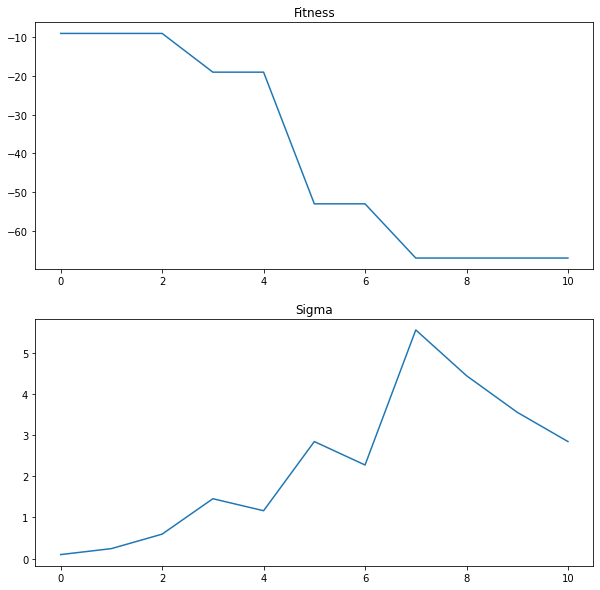

In [4]:
# Environment setup
from keras import Input
try: env.close()
except NameError: pass # `pass` literally does nothing

env     = gym.make("CartPole-v1")
# Get input size and output size from the environment
cur_state = env.reset().reshape(1,-1)
noutput = env.action_space.n
nactions = env.action_space.n
ninputs = env.observation_space.shape[0]

# Network setup 
model = Sequential()
model.add(Input(shape=env.observation_space.shape[0],))
model.add(Dense(1, activation="relu"))
model.compile(loss="mean_squared_error",
            optimizer=Adam(learning_rate=0.1))

# Fitness function: gameplay loop
def fitness(ind, render=False):
    config = model.get_config()
    weights = model.get_weights()
    for i in range( 0,  len(weights[0])):
        weights[0][i] = ind[i]
    model.set_weights(weights)
    done = False
    score = 0
    state = env.reset().reshape(1,-1)
    count = 100
    
    while not done and count>=0:
        temp = []
        val = model.predict(state)
        if val <0.5:
            action = 0
        else:
            action = 1
        
        new_state, reward, done, _ = env.step(action)  
        score += reward
        state = new_state.reshape(1,-1)
        count-=1
        if render:
            sleep(0.1) 
            env.render(mode='human')
    
    print(f"Individual score (target: -500): {-score}")
    return -score

# Neuroevolution loop
es = ES11(ndims=env.observation_space.shape[0], sigma=0.1, fitness=fitness)
es.run(ngens=10, target=-500)

# Plot performance
es.plot()

In [ ]:
# Replay winning individual
best = es.x
best_fit = fitness(best, render=True)
env.close()
print(f"Best fitness: {best_fit} (best possible score: -500)")

#### 3.2 **[2pt]** Solve the OpenAI Gym Cartpole using a single-layer recurrent network from Keras as the model, trained with CMA-ES.

- You can install `cma` from Pypi with `pipenv install cma` or (Colab) `!pip install cma`.
- This method is still industry standard. Find more about it [here](https://github.com/CMA-ES/pycma) and [here](https://pypi.org/project/cma/), what you need is basically these lines:
```python
es = cma.CMAEvolutionStrategy(<initial_center>, <initial_sigma>, <options_dict>)
es.optimize(<fitness_function>)
print(es.result_pretty()) # or other
```
The third argument `options` is an optional dictionary of options [like these](https://github.com/CMA-ES/pycma/blob/025ef1fed91c86690a21e9ed81713062d29398ff/cma/evolution_strategy.py#L416). The full documentation (for the brave) can be found [here](http://cma.gforge.inria.fr/apidocs-pycma/cma.evolution_strategy.html#fmin).
- Feel free to start from a standard normal distribution, with a mean of `np.zeros` and sigma `1`. Try different initializations to verify that the algorithm is robust to initial conditions (compared to having to restart multiple times with DL). I found it converge faster with a smaller initial sigma such as `0.01`.
- Notice during the run that you will have a broader range of scores than your ES. That is because CMA-ES has a larger population size and better exploration. At the same time though that could mean worse results: the CartPole is so easy that the ES starting at 0 does well. But for harder problems your basic ES is not going to work, while CMA-ES will.
- To make sure everything is working, you can try *printing the action* in the fitness function after every network activation.
- IMPORTANT: double check that you are correctly doing minimization/maximization. Most implementations, including `cma`, by default minimize their fitness, while the OpenAI Gym is set to maximize scores. Thus **your fitness function should return the negative of the score**.
- About 5-10 generations should be enough for the CartPole (option `{'maxiter':5}`), run longer or restart the run to improve. Compare your final setup with the complexity of the RL implementation from last week, both in terms of coding effort and run time.
- You can still plot sigmas and fitnesses but you need to find out how with CMA. Alternatively you can manage the generations yourself: the method `ask()` returns a population of individuals ready to evaluate, and the method `tell(fits)` takes a list of fitnesses and updates the underlying search distribution based on it. This way you can check each fitness and you can ask for the convergence at each generation (`es.sigma`).
- Although the mean of the distribution `es.mean` is an individual (the prototype of the search status) and can be evaluated as a network parametrization, the best individual found so far is stored in `es.best`.

In [1]:
# Most of the implementation from the last question can be reused as already declared

# Re-initialize the environment as you closed it after rendering
from keras import Input
import cma
try: env.close()
except NameError: pass # `pass` literally does nothing

env     = gym.make("CartPole-v1")
cur_state = env.reset().reshape(1,-1)
noutput = env.action_space.n
nactions = env.action_space.n
ninputs = env.observation_space.shape[0]
x = [np.random.normal(0, 0.01) for i in range(0,ninputs )]
es = cma.CMAEvolutionStrategy(x, 0.01,  {'maxiter':40})
es.optimize(fitness)
print(es.result_pretty())
# Replay winning individual
best = es.best.get()[0]
print("Best is ", best)
best_fit = fitness(best, render=True)
env.close()

NameError: name 'gym' is not defined

#### BONUS **[ZERO pt]** Re-run this exercise using your own Neural Network implementation. You can choose either Feed Forward or Recurrent, the latter being typically a bit better in this case because it can learn _momentum_. You will need to refactor the implementation to include a `set_weights()` function that partitions the individual into segments with enough weights for each weight matrix, then reshape each to the right form. You will of course not need backpropagation.

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Try solving other OpenAI Gym Environments! Most can be solved by a linear controller, but you can use one hidden layer (or better: recurrent neurons!) if you find it hard (spoilers: Acrobot). Keep layer sizes low, you rarely need more than 2x or 3x the input size.

#### BONUS **[ZERO pt]** Is the CartPole really worth the effort? Try solving it with Random Weight Guessing, which is parameter guessing (first lecture!) for neural networks. While you are at it, is parameter guessing an ES? Could you describe it in terms of $(\mu, \lambda)$?

#### BONUS **[ZERO pt]** Can you address [Atari games](https://www.gymlibrary.ml/environments/atari/)? It might be better to use convolutional networks. Just put together your hand-written convolution with your hand-written network, or write the model on Keras and use `set_weights()`. How would you design a network to play the game?

### Final considerations

*Machine Learning is the art of adapting generic solvers to specific problems.*

- *Art*, because you need to create something new. The evaluation of new methods needs to be rigorously scientific, but that comes later, ML research is first of all a creative process.
- *Generic solvers*, because models need to be generic to adapt to many different problems, and many solutions for each problem, based solely on their parametrization.
- *Adapting*, because you use algorithms to find that ideal parametrization. You can call this learning, searching, updating, feedback, even guessing: anything that improves the goodness of the parametrization over time is fair game, so don't restrict yourself to what is already known. Be bold!
- *Specific problems*, because you need to remember that the problem is king. Do not fall for the trick of designing a cool solution and then search for problems for which it is actually useful. Having amazing methods that cannot be applied to your problems has no value for you.
- The history of ML is chocked by restrictions, requirements and limitations, because we were figuring out what *learning* is, how to use models, and what is learnable. Today we finally have a good idea, so we can finally approach a much broader class of problems, but we still need to find novel ways to address them *with eyes uncluttered by preconceptions*.

Hope this course gave you a new skill. Good luck out there.